In [57]:
import requests
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

In [7]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [8]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

In [52]:
table = soup.find('div', attrs={'class':'lister list detail sub-list'})
#print(table.prettify()[1:500])

In [53]:
rowDiv = table.find_all('div',attrs={'class':'lister-item mode-advanced'})
rowDiv[3] # ambil 1

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt6751668"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt6751668/"> <img alt="Gisaengchung" class="loadlate" data-tconst="tt6751668" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYWZjMjk3ZTItODQ2ZC00NTY5LWE0ZDYtZTI3MjcwN2Q5NTVkXkEyXkFqcGdeQXVyODk4OTc3MTY@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">4.</span>
<a href="/title/tt6751668/">Gisaengchung</a>
<span class="lister-item-year text-muted unbold">(2019)</span>
</h3>
<p class="text-muted">
<span class="certificate">17+</span>
<span class="ghost">|</span>
<span class="runtime">132 min</span>
<span class="ghost">|</span>
<span cl

In [54]:
title = rowDiv[3].find('h3',attrs={'class':'lister-item-header'}).find('a').text
title

'Gisaengchung'

In [55]:
temp = [] #initiating a tuple

for i in range(0, len(rowDiv)):

    #get title
    title = rowDiv[i].find('h3',attrs={'class':'lister-item-header'}).find('a').text
    title = title.strip() #for removing the excess whitespace
    #get rating
    rating = rowDiv[i].find('div',attrs={'class':'inline-block ratings-imdb-rating'}).text
    rating = rating.strip() #for removing the excess whitespace
    #get meta score
    if(rowDiv[i].find('span',attrs={'class':'metascore favorable'})) is None: 
        metascore = '0'
    else:
        metascore = rowDiv[i].find('span',attrs={'class':'metascore favorable'}).text
    metascore = metascore.strip()
    #votes
    votes = rowDiv[i].find('span',attrs={'name':'nv'}).text
    votes = votes.strip()

    temp.append((title,rating,metascore,votes))

temp 
    

[('Sex Education', '8.3', '0', '99,428'),
 ('1917', '8.5', '78', '112,922'),
 ('The Witcher', '8.4', '0', '203,939'),
 ('Gisaengchung', '8.6', '96', '175,886'),
 ('Once Upon a Time ...in Hollywood', '7.8', '83', '356,116'),
 ('Joker', '8.6', '0', '640,018'),
 ('The Gentlemen', '8.1', '0', '15,876'),
 ('Jojo Rabbit', '8.0', '0', '66,169'),
 ('Little Women', '8.1', '91', '37,783'),
 ('The Mandalorian', '8.8', '0', '125,619'),
 ('Knives Out', '8.0', '82', '134,941'),
 ('Star Wars: Episode IX - The Rise of Skywalker', '6.9', '0', '243,496'),
 ('The Irishman', '8.0', '94', '218,562'),
 ('Terminator: Dark Fate', '6.3', '0', '80,220'),
 ('Marriage Story', '8.1', '93', '144,741'),
 ('Bombshell', '6.8', '64', '22,500'),
 ('Uncut Gems', '8.0', '90', '33,004'),
 ('The Lighthouse', '7.8', '83', '58,576'),
 ('Doctor Sleep', '7.5', '0', '58,777'),
 ('The Last Full Measure', '6.3', '0', '1,102'),
 ('Midsommar', '7.2', '72', '107,741'),
 ('Color Out of Space', '6.3', '70', '3,322'),
 ('Just Mercy', '7

In [61]:
temp = temp[::-1] #remove the header

imdb = pd.DataFrame(temp, columns = ('title','rating','metascore','votes')) #creating the dataframe

imdb

,title,rating,metascore,votes
0,Playing with Fire,4.8,0,"3,895"
1,Waves,7.8,80,"4,562"
2,Ad Astra,6.7,80,"133,951"
3,Jay and Silent Bob Reboot,5.9,0,"7,546"
4,Gemini Man,5.7,0,"49,287"
5,The Good Liar,6.5,0,"7,818"
6,His Dark Materials,8.0,0,"28,533"
7,Servant,7.7,0,"7,569"
8,Virgin River,7.6,0,"6,578"
9,Watchmen,8.1,0,"56,426"


In [62]:
imdb.dtypes

title        object
rating       object
metascore    object
votes        object
dtype: object

In [67]:
#Rubah data type
imdb[['rating','metascore']]=imdb[['rating','metascore']].astype('float')
imdb['title']=imdb['title'].astype('category')

In [76]:
imdb['votes']=imdb['votes'].str.replace(',', '')
imdb['votes']=imdb['votes'].astype('int')

<Figure size 1500x600 with 0 Axes>

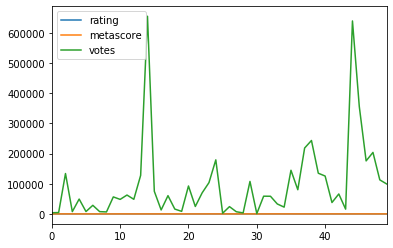

In [77]:
fig = plt.figure(figsize=(5,2),dpi=300)
imdb.plot()